# Usage

Djalgo is designed to generate musical pieces as generic Python objects.

- A note is defined as a tuple of (midi pitch, duration time, time offset from the start). A rest is a note with a pitch defined as `None`. A rhythm is the same thing of a note, but without pitch, i.e. a (duration, offset) tuple.
- A track is a list of notes.
- A piece is a list of tracks.

Such objects can be converted to several music packages in Python, like Music21, Pretty-Midi, Mido and SCAMP.

To start with djalgo, install it then lauch your session by importing the package. The alias `dj` will be used through the documentation.

In [1]:
import djalgo as dj

Djalgo is a comprehensive Python toolkit for music composition, offering a wide range of functionalities designed for music analysts, composers, and enthusiasts. Here’s a snapshot of what Djalgo brings to the table:

- **Analysis**: Located in `analysis.py`, discover a suite of indices for dissecting tracks—whether it’s pitches, durations, or offsets. These metrics serve not just for analysis but also as benchmarks for the evolutionary algorithms found in `genetic.py`.
- **Conversion**: `conversion.py` is your gateway to integrating Djalgo with popular music packages. Transform notes and compositions into formats compatible with Music21 for notation, Pretty-Midi for MIDI refinements, and SCAMP for sound production. Installing these packages is a prerequisite for conversion.
- **Artificial Intelligence**: In `djai.py`, unleash the power of machine learning to both analyze MIDI files and generate new music pieces, all powered by TensorFlow.
- **Fractals**: `fractal.py` delves into the beauty of mathematics, extracting music from the intricate patterns of fractals.
- **Genetic Algorithms**: Use `genetic.py` to evolve your music, steering it towards specific analytical targets defined in `analysis.py`.
- **Harmony**: `harmony.py` equips you with tools to enrich compositions with scales, voicings, and ornamental touches.
- **Loop Visualization**: `loop.py` helps visualize musical loops with radar plots, offering a new dimension to beat creation.
- **Minimalism**: Explore minimalist techniques in `minimalism.py`, from additive and subtractive processes to Arvo Pärt’s tintinnabuli, and craft music with a minimalist ethos.
- **Rhythm**: The `Rhythm` class in `rhythm.py` is designed for crafting and experimenting with complex rhythmic structures.
- **Utilities**: `utils.py` provides essential tools for fine-tuning: repair, tune, and quantize your compositions to perfection.
- **Random and Kernel Walks**: In `walk.py`, let music wander through algorithmic paths, guided by random and kernel-induced decisions.



# Utils

What is MIDI note 60?

In [2]:
dj.utils.midi_to_pitch(60)

'C4'

Which MIDI note is G#5?

In [3]:
dj.utils.pitch_to_midi('G#5')

80

## Harmony

### Scale

The harmony module contains tools for generating scales and chords. The scale generator outputs all midi note numbers spaning from 0 to 127 for a given scale. Supported scales are given in `dj.harmony.MusicTheoryConstants.scale_intervals.keys()`.

In [4]:
scale_ = dj.harmony.Scale(tonic = 'C', scale_type = 'major').generate()
scale_[35:43]

[60, 62, 64, 65, 67, 69, 71, 72]

You can specify your own intervals, an interval of 1 in midi notes being a semitone.

In [5]:
scale_ = dj.harmony.Scale(tonic = 'C', scale_type = [0, 2, 3, 5, 6, 8, 10]).generate()
scale_[35:43]

[60, 62, 63, 65, 66, 68, 70, 72]

### Progression

Random progressions can be generated using different circles, the circle of fifths (`'P5'`) being the most popular.

In [6]:
dj.harmony.Progression(
    tonic_pitch='D3',
    circle_of='P5'
).generate(length=8, seed=5)

[[52, 55, 59],
 [52, 56, 59],
 [50, 53, 56],
 [50, 53, 57],
 [50, 53, 57],
 [57, 61, 64],
 [50, 53, 56],
 [52, 55, 59]]

### Voice

Voices can be generated for each note. These are just lists, but iterating through them can generate either chords and arpeggios.

In [7]:
dj.harmony.Voice(
    tonic = 'C',
    scale_type = 'major',
    degrees=[0, 2, 4] # triads
).generate(pitches=[60, 62, 64, 65, 67, 69, 71, 72])

[[60, 64, 67],
 [62, 65, 69],
 [64, 67, 71],
 [65, 69, 72],
 [67, 71, 74],
 [69, 72, 76],
 [71, 74, 77],
 [72, 76, 79]]

### Ornaments

Ornaments alter a list of notes to create a richer score. Djalgo has six types of ornaments.

**Grace note** adds a note randomly drawned from the list given in `grace_pitches` at the place given by `note_index`.

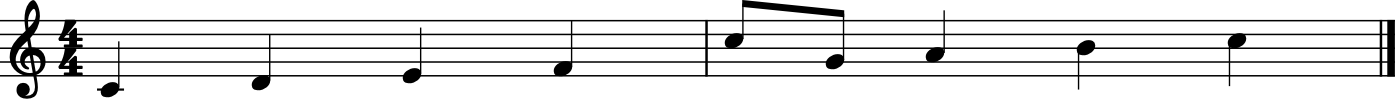

In [8]:
ornam = dj.harmony.Ornament(
    type='grace_note',
    grace_note_type='appoggiatura',
    grace_pitches=[72]
).generate(
    notes=[(60, 1, 0), (62, 1, 1), (64, 1, 2), (65, 1, 3), (67, 1, 4), (69, 1, 5), (71, 1, 6), (72, 1, 7)],
    note_index=4
)
dj.conversion.convert(ornam, to='music21').show()

**Trill** gets the degree given by `by` from the note at `note_index` and oscillates at rate of `trill_rate` between the note and its degree.

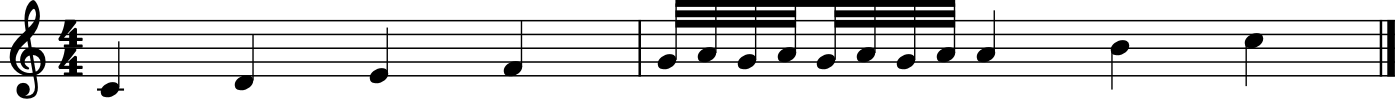

In [9]:
ornam = dj.harmony.Ornament(
    type='trill',
    trill_rate=0.125,
    by=1,
    tonic='C',
    scale_type='major'
).generate(
    notes=[(60, 1, 0), (62, 1, 1), (64, 1, 2), (65, 1, 3), (67, 1, 4), (69, 1, 5), (71, 1, 6), (72, 1, 7)],
    note_index=4
)
dj.conversion.convert(ornam, to='music21').show()

**Mordent** rapidly alternates between the original pitch and one step defined `by`.

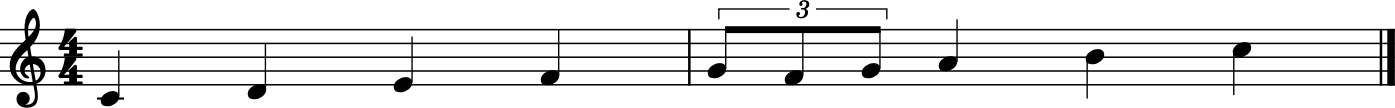

In [10]:
ornam = dj.harmony.Ornament(
    type='mordent',
    by=-1,
    tonic='C',
    scale_type='major'
).generate(
    notes=[(60, 1, 0), (62, 1, 1), (64, 1, 2), (65, 1, 3), (67, 1, 4), (69, 1, 5), (71, 1, 6), (72, 1, 7)],
    note_index=4
)
dj.conversion.convert(ornam, to='music21').show()

**Arpeggio** transforms a note to an arpeggio given by a list of degrees.

In [11]:
ornam = dj.harmony.Ornament(
    type='arpeggio',
    tonic='C',
    scale_type='major',
    arpeggio_degrees=[0, 4, 2, 0]
).generate(
    notes=[(60, 1, 0), (62, 1, 1), (64, 1, 2), (65, 1, 3), (67, 1, 4), (69, 1, 5), (71, 1, 6), (72, 1, 7)],
    note_index=4
)
dj.conversion.convert(ornam, to='music21').show('midi')

**Turn** is a transition of four notes betweem `note_index` and the next note.

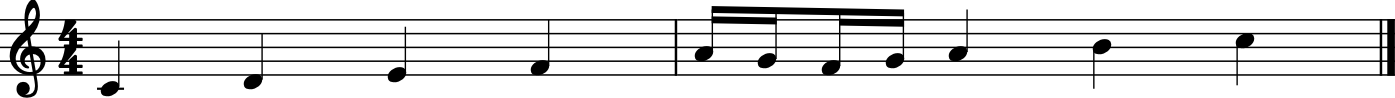

In [12]:
ornam = dj.harmony.Ornament(
    type='turn',
    tonic='C',
    scale_type='major'
).generate(
    notes=[(60, 1, 0), (62, 1, 1), (64, 1, 2), (65, 1, 3), (67, 1, 4), (69, 1, 5), (71, 1, 6), (72, 1, 7)],
    note_index=4
)
dj.conversion.convert(ornam, to='music21').show()

**Silde** in Djalgo is not a glissando per se. Glissandos should be defined at the instrument level with your prefered package (`Instrument` in Pretty-midi and `Stream` in music21). Slide transits on the chromatic scale from a note to the next.

In [13]:
ornam = dj.harmony.Ornament(
    type='slide',
    slide_length=5
).generate(
    notes=[(60, 1, 0), (62, 1, 1), (64, 1, 2), (65, 1, 3), (67, 1, 4), (72, 1, 5), (74, 1, 6), (76, 1, 7), (72, 2, 8)],
    note_index=4
)
dj.conversion.convert(ornam, to='music21').show('midi')

## Rhythm

The random rhythm generator generates a sequence of random rhythms (tuples of (duration, offset)). The `random` method draws numbers from the `durations` list until they sum up to the `measure_length`. The `darwin` method uses a genetic algorithm to obtain similar results.

In [6]:
import djalgo as dj

In [17]:
rhythm_ = dj.rhythm.Rhythm(
    measure_length=8,
    durations = [0.5, 1, 2]
).darwin(seed=3)
rhythm_

[(0.5, 0), (2, 0.5), (2, 3), (2, 4.5), (1, 5), (0.5, 6.5)]

A random progression of the same length can be generated, mapped to the rhythm, and transformed to a Music21 stream to create a score or a midi. The radius argument is the spread of the chords in the circle across [major chords, minor chords, diminished chords], usually `[3, 3, 1]`.

In [18]:
progression = dj.harmony.Progression(
    tonic_pitch='C3',
    circle_of='P5',
    radius=[3, 3, 1]
).generate(length=len(rhythm_), seed=5)
random_progression = [(p, d, o) for p, (d, o) in zip(progression, rhythm_)]
random_progression

[([50, 53, 57], 0.5, 0),
 ([50, 54, 57], 2, 0.5),
 ([48, 51, 54], 2, 3),
 ([48, 51, 55], 2, 4.5),
 ([48, 51, 55], 1, 5),
 ([55, 59, 62], 0.5, 6.5)]

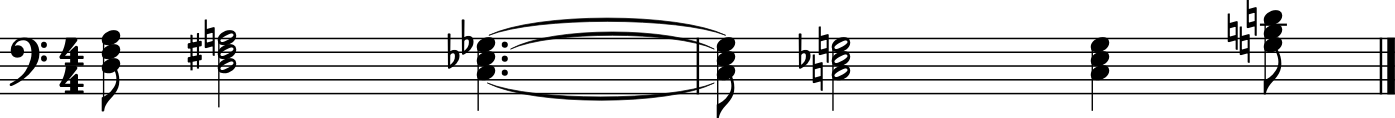

In [19]:
rp_m21 = dj.conversion.to_music21(random_progression)
rp_m21.show()

In [20]:
rp_m21.show('midi')

## Loops

...

## Minimalism

Minimalism is a musical trend applying simple operations to sequences of notes. This class is very much inspired by the *Arvo* package, from composer George Dimitrov. I have implemented a Process class, which takes care of additive and subtractive processes through different directions: forward, backward, inward and outward. The additive process expends the medoly, while the subtractive process shrinks it. Minimalism also contains tintinnabuli, a process developed by the composer Arvo Pärt. 

### Process

In [17]:
notes_ = [0, 1, 2, 3, 4, 5, 6]
af = dj.minimalism.Minimalism.Process(operation = 'additive', direction='forward')
print("AF", af.generate(notes_))

sb = dj.minimalism.Minimalism.Process(operation = 'subtractive', direction='backward')
print("SB", sb.generate(notes_))

ai = dj.minimalism.Minimalism.Process(operation = 'additive', direction='inward')
print("AI", ai.generate(notes_))

so = dj.minimalism.Minimalism.Process(operation = 'subtractive', direction='outward')
print("SO", so.generate(notes_))


AF [0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 6]
SB [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 0, 1, 0]
AI [0, 0, 6, 0, 1, 6, 0, 1, 5, 6, 0, 1, 2, 5, 6, 0, 1, 2, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]
SO [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 4, 5, 6, 0, 1, 2, 5, 6, 0, 1, 5, 6, 0, 1, 6, 0, 6, 0]


### Tintinabuli

Tintinnabuli compositions are typically structured around two voices. The "melodic voice", or *m-voice*, is the melody. The "tintinnabular voice", or *t-voice*, plays notes from a list of notes, usually the tonic triad, with the same rhythm as the *m-voice*. The pitch is changed to the next highest (or lowest, or nearest) pitch from the list of the *t-voice*.  While the melodic voice usually follows a scale, the tintinnabular voice arpeggiates the tonic triad. This means that while the melodic voice may ascend or descend by steps, the tintinnabular voice resonates with notes from the home chord, creating a bell-like effect. The interaction between these two voices creates a unique form of counterpoint (the relationship between two or more musical lines). The simplicity and predictability of the tintinnabular voice, combined with the more variable melodic voice, result in a rich yet meditative harmonic texture.

In [18]:
tu = dj.minimalism.Minimalism.Tintinnabuli(
    t_chord=[60, 62, 72, 76, 79, 96],
    direction='nearest',
    rank=0
)
tu.generate([59, 72, 74, 76, 77, 79, 81, 83, 84])

[60, 72, 72, 76, 76, 79, 79, 79, 79]

### Climax

GA

## Walk

I designed two types of walks, 

### Chain walk

A Markov chain is a random walk, where we sequentially offset the point from the previous position by a random number. You can specify a distribution or a list of offsets. You might also specify a range of values in `walk_range` that restricts the signal to lie in a given channel. In a list, a number specified twice will have twice the chance to be drawned. The `branching_probability` is, at each step, the probability that a random walk branches. The `merging_probability` is the probability that two signals merge when they collide. Such Markov chain is called a branching and merging Markov chain with boundaries. Don't worry about Markov chains only generating numbers, not pitches.

In [19]:
import djalgo as dj
import scipy
import plotly.graph_objects as go

In [22]:
cw = dj.walk.Chain(
    walk_range = [24, 48],
    walk_start=36,
    length=60,
    branching_probability=0.025,
    merging_probability=0.9,
    walk_probability=scipy.stats.norm(loc=0, scale=2)
)
cw_sequences = cw.generate(seed=20)

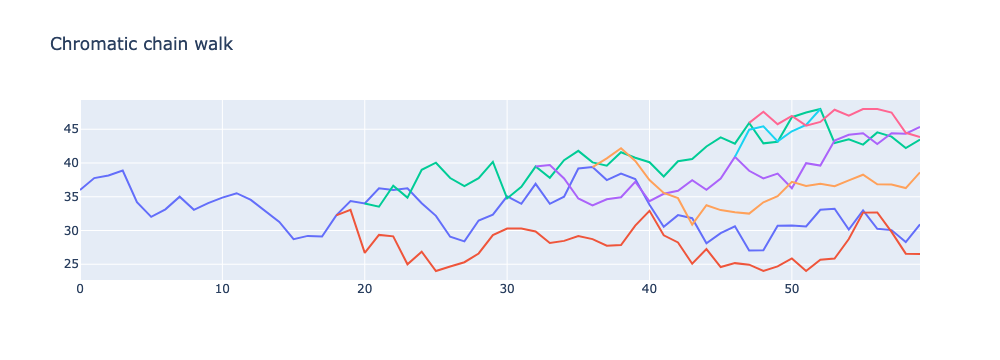

In [23]:
fig = go.Figure()
for i, seq in enumerate(cw_sequences):
    fig.add_trace(go.Scatter(
        x=[i for i, val in enumerate(seq) if val is not None],
        y=[val for val in seq if val is not None],
        mode='lines'
    ))
fig.update_layout(showlegend=False, title='Chromatic chain walk')
fig.show()

The generated numbers can really be anything. In a musical piece, mapping these numbers to pitches is the most obvious application. But when dealing with MIDI data, it can be velocity (the volume of a note), of any MIDI channel associated to a characteristic of a virtual instrument. Although Markov chains offers many possibilities, we will focus on pitches.

There are, again, multiple ways to transform a Markov chain to pitches. The chains previously generated were restricted to lie between 24 and 48. We could change the range of the values using a scaling function, such as `dj.utils.scale_list()`, but between 24 and 48 seems fair.

It worth noting that MIDI pitches are integers. The value will need to be rounded. But if you really need fractional pitches, you can use pitch bends. You will have to isolate the fraction with the modulo `%` operator, then scale the fraction with `dj.utils.scale_list([fraction], 0, 8192, 0, 1)`, the assign as pitch bend with Music21 of Pretty-midi. Whether or not you use a pitch bend, the pitches will belong to the chromatic scale (all 12 pitches).

If you prefer generating pitches on a scale, the random walk can represent the index of the pitches belonging to a scale.

In [24]:
import copy
c_major = dj.harmony.Scale('C', 'major').generate()
cw_pitches = copy.copy(cw_sequences)
for i, seq in enumerate(cw_sequences):
    for j, n in enumerate(seq):
        cw_pitches[i][j] = c_major[int(round(n, 0))] if n is not None else None

In [25]:
fig = go.Figure()
for i, seq in enumerate(cw_pitches):
    fig.add_trace(go.Scatter(
        x=[i for i, val in enumerate(seq) if val is not None],
        y=[val for val in seq if val is not None],
        mode='lines'
    ))
fig.update_layout(showlegend=False, title='Chain walk on C-major')
fig.show()

#### Interpolate chain walk

When working with walk, the composer can record every value of a walk, then map each value with the variable of choice, often pitches. This way, every value of a walk will be considered or played, and the x-axis is considered a sequence of events. Another option is to consider the x-axis as time where values are recorded when events occur. The pitch of a walk will then be recovered on the offset of a note.

In [27]:
measure_length = 8
rhythm = dj.rhythm.Rhythm(measure_length, durations=[0.25, 0.5, 1]).random(seed=4)
len(rhythm)

12

The rhythm contains 12 elements. If we want 3 measures, we need to map $12 \times 3 = 36$ pitches. The rw_pitches is a list of 60 items, so we have enough pitches. We can iterate over rhythms and map the pitches along.

In [28]:
from itertools import cycle
cycle_rhythm = cycle(rhythm)
n_notes = len(rhythm) * 3
cw_score = []
for seq in cw_pitches:
    cw_notes = []
    for i in range(n_notes):
        new_note = seq[i]
        if new_note is not None:
            new_duration = next(cycle_rhythm)[0]
            new_offset = next(cycle_rhythm)[1] + i // measure_length * measure_length
            cw_notes.append((new_note, new_duration, new_offset))
    if len(cw_notes) > 0:
        cw_score.append(cw_notes)

In [29]:
cw_m21 = dj.conversion.to_music21(cw_score)
cw_m21.show('midi')

Although we likely would prefer a sequence x-axis for step-wise Markov chains, time x-axis would be preferable for smooth kernels.

### Kernel walks

Au Gaussian process is a multivariate normal distribution with infinite dimensions. When dimensions are stacked together, we obtain a continuous axis. The covariance of the gaussian process is typically a function where dimensions close to each other are correlated. Each sample of a gaussian process is thus a smooth signal.

In [30]:
import djalgo as dj
import plotly.graph_objects as go
length = 100
amplitude=10.0
length_scale=10.0
kw = dj.walk.Kernel(
    walk_around=80,
    length=length,
    data=None,
    length_scale=length_scale,
    amplitude=amplitude
)
kw_sequence = kw.generate(seed=1, nsamples=3)

In [31]:
fig = go.Figure()
for i, seq in enumerate(kw_sequence):
    fig.add_trace(go.Scatter(
        x=[i for i, val in enumerate(seq) if val is not None],
        y=[val for val in seq if val is not None],
        mode='lines'
    ))
fig.update_layout(showlegend=False)
fig.show()

The most interesting property of Gaussian processes is that they can be forced to pass through predetermined points. You will need to install the *scikit-learn* library (`pip install scikit-learn`) to use the `gp_data` argument.

In [32]:
import numpy as np
data = np.array([
    [10, 74],
    [30, 77],
    [60, 72]
])
kw_sequences_data = kw.generate(data=data, seed=None, nsamples=3)

/Users/essi/virtual-environments/musicbook/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:424: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 9.5. Decreasing the bound and calling fit again may find a better value.



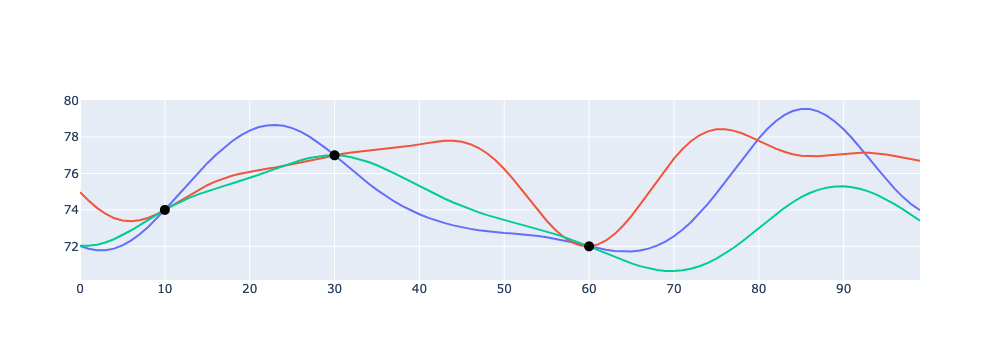

In [33]:
fig = go.Figure()
for i, seq in enumerate(kw_sequences_data):
    fig.add_trace(go.Scatter(
        x= np.linspace(0, length-1, length),
        y=kw_sequences_data[i],
        mode='lines'
    ))
fig.add_trace(go.Scatter(x=data[:,0], y=data[:,1], mode='markers', marker=dict(size=10, color='black')))
fig.update_layout(showlegend=False)
fig.show()

CRC Press, music shelf - technology , let's do some cool stuff with Python by playing.



#### Interpolate kernel walks

### Mandelbrot

Composing music with fractals is not given to anyone. Until I made a Mandelbrot generator!

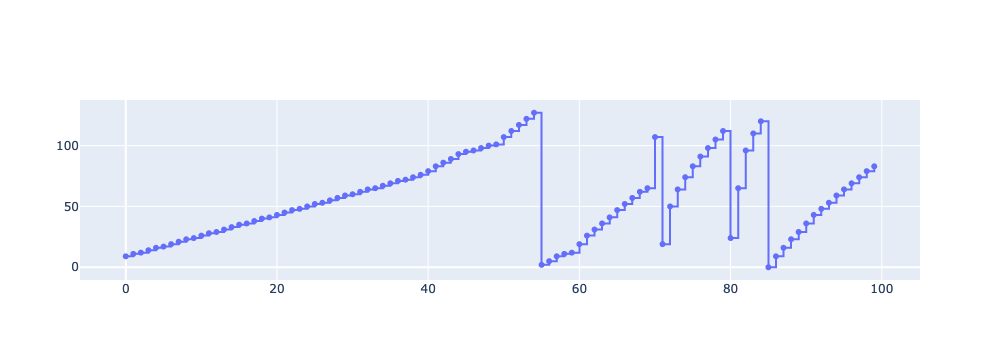

In [34]:
length = 100
mdb = dj.fractal.Mandelbrot(
    scale=c_major,
    start_note_index=4,
    length=length,
    x_min=-1, x_max=-2,
    y_min=-3, y_max=1,
    max_iter=100,
    center_offset=False
).generate()

go.Figure(go.Scatter(
    x = np.arange(length),
    y = mdb,
    mode = 'lines+markers',
    line = dict(shape = 'hv')
))

### Cellular automata

...

In [35]:
ca_genarator = dj.signal.Signal.CellularAutomata(
    scale=[60, 62, 64, 65, 66, 67, 72, 31],
    length=30,
    rules='097'
)
plt.matshow(np.array(ca_genarator.create_ca1D()).transpose(), cmap ="binary")

AttributeError: module 'djalgo' has no attribute 'signal'

# Examples

*Djalgo* is based on Python base packages as most as possible. In the following code block, `scale_[35:43]` is just a list of integers. But feeded to a music21 stream, it becomes a musical object that can be printed out.

## Cellular automata

In [72]:
import itertools
import music21 as m21
beat = itertools.cycle(dj.rhythm.Rhythm(measure_length=16).random(durations = [0.5, 0.5, 1, 2]))
ca_genarator = dj.fractal.CellularAutomata(
    scale=[60, 62, 64, 65, 66, 67, 72, 31],
    length=30,
    rules='097'
)
ca_list = ca_genarator.generate()
my_stream = m21.stream.Stream()
for n_ in ca_list:
    if n_ is None:
        n_ = m21.note.Rest(quarterLength = next(beat))
    elif isinstance(n_, int):
        n_ = m21.note.Note(n_, quarterLength = next(beat))
    else:
        n_ = m21.hord.Chord(n_, quarterLength = next(beat))
    my_stream.append(n_)

my_stream.show('midi')

TypeError: Cannot convert num: (0.5, 0.0)